In [0]:
#Python Code using Keras and Tensorflow  for Predicion of Nanofluid Viscosity prediction with 98% accuracy
#Same Dataset of the paper "Prediction of Viscosity of Water Based Al2O3, TiO2, SiO2 and CuO Nanofluids
#using a Reliable Approach"
#is used in this work
# Dataset Size: 792 X 6 
# No of data is being used to train the model is 594 and rest for testing.
#Written by Dr. Satyasaran Changdar
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error  
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from tensorflow import set_random_seed
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf



In [0]:
#Preprocess data and split the data set for training and testing
ss = MinMaxScaler()
#data = pd.read_csv('NanoViscoDataAL2O3.csv')
data = pd.read_csv('largedata.csv')
X = data.iloc[:,:5]
y = data.iloc[:,5]
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle = True, random_state = 123)
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
scaler = MinMaxScaler().fit(y_train.values.reshape(-1,1))
y_train = scaler.transform(y_train.values.reshape(-1,1))
y_test  = scaler.transform(y_test.values.reshape(-1,1))

In [0]:
print((X_train.shape))

(594, 5)


In [0]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
def ms(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)


def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))
# simple Keras sequential model
np.random.seed(1337) 

set_random_seed(1337)
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=64, activation='relu', input_dim=5))
prediction_network.add(Dense(units=64, activation = 'relu'))
prediction_network.add(Dense(units=32, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'relu'))
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
prediction_network.compile(optimizer=optimizers.Adam(lr=.001), loss=ms, metrics=[ms,rmse,r_square])
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#Fitting model
result=prediction_network.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test), callbacks=[earlystopping])
# Predict the test set
pd.DataFrame(result.history).to_csv("history.csv")
y_pred = prediction_network.predict(X_test)
wl1=prediction_network.layers[0].get_weights()
#first_layer_weights = model.layers[0].get_weights()[0]

In [0]:
print(y_pred)

In [0]:
wl1=prediction_network.layers[2].get_weights()

In [0]:
print(wl1[0][0:5])

In [0]:
score=prediction_network.evaluate(X_test,y_test)

198/198 [==============================] - 0s 108us/step


In [0]:
mse = mean_squared_error(y_test, y_pred)
mscore=prediction_network.evaluate(X_test,y_test)
print("Mean Square Error : {:.6f}".format(mse))
print("Root Mean Square Error : {:.6f}".format(np.sqrt(mse)))
print("R^2= : {:.6f}".format(mscore[3]))

SS_res =  np.sum(np.square(y_test - y_pred)) 
SS_tot = np.sum(np.square(y_test - np.mean(y_test))) 
rs=(1 - SS_res/(SS_tot ))
print(rs)


198/198 [==============================] - 0s 84us/step
Mean Square Error : 0.000832
Root Mean Square Error : 0.028844
R^2= : 0.964538
0.9688724581249573


In [0]:
prediction_network.summary()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


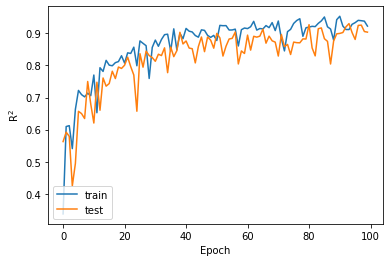

In [0]:
# plot training curve for R^2 
plt.plot(result.history['r_square'])
plt.plot(result.history['val_r_square'])
#plt.title('Visualize R^2 history')
plt.ylabel('R$^2$')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='lower left')
plt.savefig("R_square.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


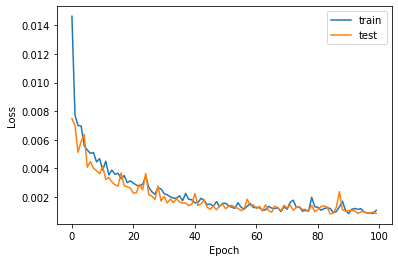

In [0]:
# plot training curve for Loss 
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
#plt.title('Visualize loss history')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper right')
plt.savefig("Visualizelosshistory.eps")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


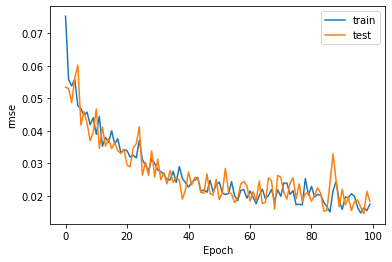

In [0]:
# plot training curve for rmse
plt.plot(result.history['rmse'])
plt.plot(result.history['val_rmse'])
#plt.title('Root mean square')
plt.ylabel('rmse')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig("RootMeanSquare.eps")
plt.show()

In [0]:
test_predictions = prediction_network.predict(X_test).flatten()
plt.scatter(y_test, y_pred)
plt.xlabel('Experimental')
plt.ylabel('Predictions')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())

plt.plot([-10, 10],[-10,10],'k')
plt.scatter(Xn,Yn,'r')
plt.savefig('TrueVsPredicted.eps')

True Vs Predicted On Training Data Set

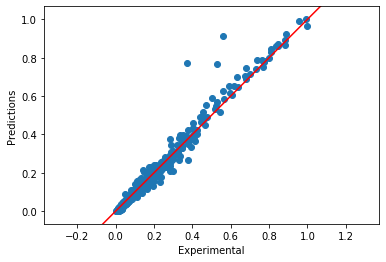

In [0]:
y_train_pre= prediction_network.predict(X_train)
plt.scatter(y_train, y_train_pre)
plt.xlabel('Experimental')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-10, 10],[-10,10],'r')
plt.savefig('ExperimentalVsPredicted_On_TrainingData.eps')

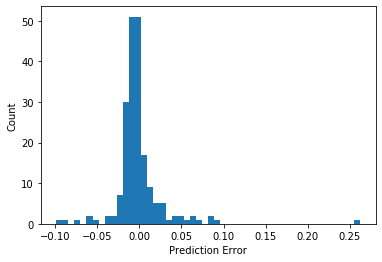

In [0]:
error = y_pred - y_test
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.savefig('ErrorHistogram.eps')

Regression Line  Experimental Vs  Predicted 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.




Mean absolute error (MAE):      0.019966
Mean squared error (MSE):       0.000890
Root mean squared error (RMSE): 0.029831
R square (R^2):                 0.966705


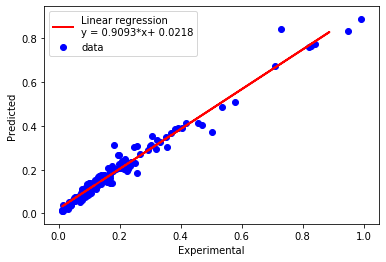

In [0]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(y_test.reshape(-1,1), y_pred)  
y_fit = regressor.predict(y_pred) 
reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_coef) + "*x+ " + str(reg_intercept)
plt.scatter(y_test, y_pred, color='blue', label= 'data')
plt.plot(y_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
#plt.title('Linear Regression')
plt.legend()
plt.xlabel('Experimental')
plt.ylabel('Predicted')

plt.savefig('UsingLinearRegression.eps')

#-----------------------------------------------------------------------------
#-----------------------------------------------------------------------------
import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y_test,y_pred))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_test,y_pred)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(y_test,y_pred))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.




Mean absolute error (MAE):      0.019458
Mean squared error (MSE):       0.000921
Root mean squared error (RMSE): 0.030352
R square (R^2):                 0.968237


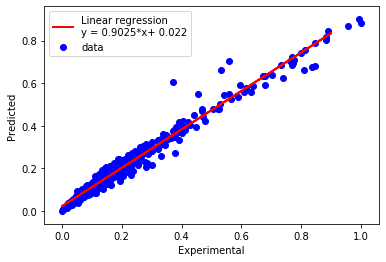

In [0]:
y_train_pre= prediction_network.predict(X_train)
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(y_train.reshape(-1,1), y_train_pre)  
y_fit = regressor.predict(y_train_pre) 
reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_coef) + "*x+ " + str(reg_intercept)
plt.scatter(y_train, y_train_pre, color='blue', label= 'data')
plt.plot(y_train_pre, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
#plt.title('Linear Regression')
plt.legend()
plt.xlabel('Experimental')
plt.ylabel('Predicted')
plt.savefig('UsingLinearRegression_Train.eps')

#-----------------------------------------------------------------------------
#-----------------------------------------------------------------------------
import sklearn.metrics, math
print("\n")
print("Mean absolute error (MAE):      %f" % sklearn.metrics.mean_absolute_error(y_train,y_train_pre))
print("Mean squared error (MSE):       %f" % sklearn.metrics.mean_squared_error(y_train,y_train_pre))
print("Root mean squared error (RMSE): %f" % math.sqrt(sklearn.metrics.mean_squared_error(y_train,y_train_pre)))
print("R square (R^2):                 %f" % sklearn.metrics.r2_score(y_train,y_train_pre))

`**Prediction of single data set**

In [0]:
Xnew = np.array([[1,47,9.4,22.49507,0.943301]])
Xnew= ss.transform(Xnew)
ynew= prediction_network.predict(Xnew)
ynew = scaler.inverse_transform(ynew) 
Xnew = ss.inverse_transform(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[ 1.       47.        9.4      22.49507   0.943301], Predicted=[4.7011533]


**Prediction of Entire data set**

In [0]:
data = pd.read_csv('largedata.csv')
Xn = data.iloc[:,:5]
Xn= ss.transform(Xn)
yn= prediction_network.predict(Xn)
yn = scaler.inverse_transform(yn) 
Xn = ss.inverse_transform(Xn)
print("X=%s" % (Xn[0:5,:]))
print("Predicted=%s" % (yn[0:5]))
np.savetxt('yp.csv', yn, delimiter=',', fmt='%s')

**Comparison of different models with our deep learning model [Nanofluid Viscosity Vs Volume Concentration**
Nanoparticle Al2O3: size 43nm and Temerature  25 degree C




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


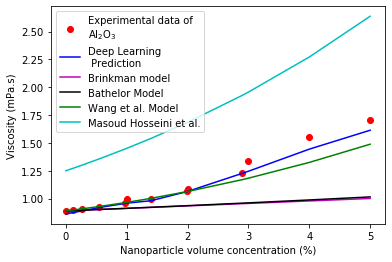

In [0]:
alpha=-0.485
mfactor= 0.72
beta=14.94
gamma=0.0105
Tzero=20
dp=43
R=1
fT=25

def Brinkman(fBaseV,pPhi):
    pPhi=pPhi*.01
    return (np.multiply((1+2.5*pPhi),fBaseV))
def Bathelor(fBaseV,pPhi):
    pPhi=pPhi*.01    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi),fBaseV))
def Wang(fBaseV,pPhi):
    pPhi=pPhi*.01     
    return (np.multiply((1+7.3*pPhi+123*pPhi*pPhi),fBaseV))
def Masoud(fBaseV,pPhi):
    pPhi=pPhi*.01    
    return (np.multiply(np.exp(mfactor+(alpha/Tzero)*fT+(beta*pPhi)+(gamma*dp)/(1+R)),fBaseV))
datag = pd.read_csv('VisVsPhi_dp_43nm_T25degreeC.csv')
phin= datag.iloc[:,0:1]
ExpVis=datag.iloc[:,2:3]
PredVis=datag.iloc[:,3:4]
BaseVis=datag.iloc[:,1:2]
phin=phin.to_numpy()
nExpVis=ExpVis.to_numpy() # Converting to numpy array so that numpy features can be applied
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy()
#phin=0.01*np.ones(np.size(nBaseVis)).reshape(-1,1)
plt.plot(phin,nExpVis,'ro')
plt.plot(phin,PredVis,'b')
plt.plot(phin, Brinkman(nBaseVis,phin),'m')
plt.plot(phin, Bathelor(nBaseVis,phin),'k')
plt.plot(phin, Wang(nBaseVis,phin),'g')
plt.plot(phin, Masoud(nBaseVis,phin),'c')
plt.legend(['Experimental data of\nAl$_2$O$_3$ ','Deep Learning \n Prediction','Brinkman model','Bathelor Model','Wang et al. Model','Masoud Hosseini et al.'], loc='upper left')
plt.xlabel('Nanoparticle volume concentration (%)')
plt.ylabel('Viscosity (mPa.s)')
plt.savefig('Comparison_Al2o3volume concentration (%).eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


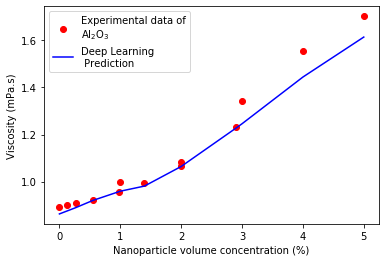

In [0]:
datag = pd.read_csv('VisVsPhi_dp_43nm_T25degreeC.csv')
phin= datag.iloc[:,0:1]
ExpVis=datag.iloc[:,2:3]
PredVis=datag.iloc[:,3:4]
BaseVis=datag.iloc[:,1:2]
phin=phin.to_numpy()
nExpVis=ExpVis.to_numpy() # Converting to numpy array so that numpy features can be applied
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy()
#phin=0.01*np.ones(np.size(nBaseVis)).reshape(-1,1)
plt.plot(phin,nExpVis,'ro')
plt.plot(phin,PredVis,'b')
plt.legend(['Experimental data of\nAl$_2$O$_3$ ','Deep Learning \n Prediction'], loc='upper left')
plt.xlabel('Nanoparticle volume concentration (%)')
plt.ylabel('Viscosity (mPa.s)')
plt.savefig('Comparison_Al2o3volume concentration (%)1.eps')
plt.show()

**Comparison of different models with our deep learning model [Nanofluid Viscosity Vs Temperature]**
Nanoparticle Al2O3: size 47nm and volume Concentration 1 %

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


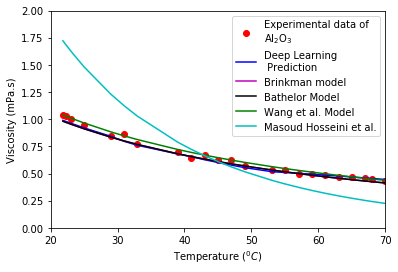

In [0]:
alpha=-0.485
mfactor= 0.72
beta=14.94
gamma=0.0105
Tzero=20
dp=47
R=1
def Brinkman(fBaseV,pPhi):
    return (np.multiply((1+2.5*pPhi),fBaseV))
def Bathelor(fBaseV,pPhi):    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi),fBaseV))
def Wang(fBaseV,pPhi):    
    return (np.multiply((1+7.3*pPhi+123*pPhi*pPhi),fBaseV))
def Masoud(fBaseV,pPhi,fnT):    
    return (np.multiply(np.exp(mfactor+(alpha/Tzero)*fnT+beta*pPhi+(gamma*dp)/(1+R)),fBaseV))
datag = pd.read_csv('VisVsTempfor_d47phi1.csv')
T = datag.iloc[:,0:1]
ExpVis=datag.iloc[:,1:2]
PredVis=datag.iloc[:,2:3]
BaseVis=datag.iloc[:,3:4]
nT=T.to_numpy()
nExpVis=ExpVis.to_numpy() # Converting to numpy array so that numpy features can be applied
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy()
phin=0.01*np.ones(np.size(nBaseVis)).reshape(-1,1)
plt.plot(nT,nExpVis,'ro')
plt.plot(nT,PredVis,'b')
plt.plot(nT, Brinkman(nBaseVis,phin),'m')
plt.plot(nT, Bathelor(nBaseVis,phin),'k')
plt.plot(nT, Wang(nBaseVis,phin),'g')
plt.plot(nT, Masoud(nBaseVis,phin,nT),'c')
plt.ylim(0, 2)
plt.xlim(20, 70)
plt.legend(['Experimental data of\nAl$_2$O$_3$ ','Deep Learning \n Prediction','Brinkman model','Bathelor Model','Wang et al. Model','Masoud Hosseini et al.'], loc='upper right')
plt.xlabel('Temperature ($^0C$)')
plt.ylabel('Viscosity (mPa.s)')
plt.savefig('Comparison_Al2o3_Temperature(Concentration 1%).eps')
plt.show()


**Comparison_Al2o3_Temperature(Concentration 4%)(Exp Vs Predicted)**

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


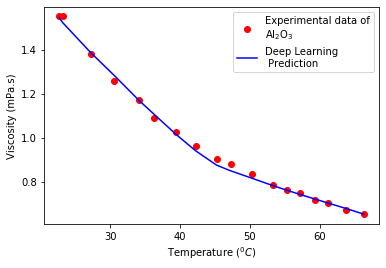

In [0]:
datag = pd.read_csv('VisVsTempfor_d47phi4.csv')
T = datag.iloc[:,0:1]
ExpVis=datag.iloc[:,1:2]
PredVis=datag.iloc[:,2:3]
BaseVis=datag.iloc[:,3:4]
nT=T.to_numpy()
nExpVis=ExpVis.to_numpy()
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy()
plt.plot(nT,nExpVis,'ro')
plt.plot(nT,PredVis,'b')
plt.legend(['Experimental data of\nAl$_2$O$_3$ ','Deep Learning \n Prediction'], loc='upper right')
plt.xlabel('Temperature ($^0C$)')
plt.ylabel('Viscosity (mPa.s)')
plt.savefig('Comparison_Al2o3_Temperature(Concentration 4%)(Exp Vs Predicted).eps')
plt.show()

**Comparison of different models with our deep learning model [Nanofluid Viscosity Vs Temperature]**
Nanoparticle Al2O3: size 47nm and volume Concentration 4 %

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


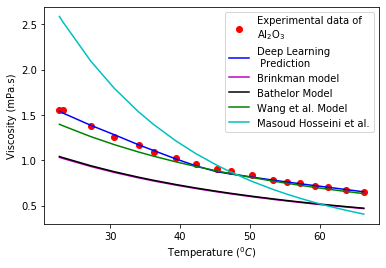

In [0]:
alpha=-0.485
mfactor= 0.72
beta=14.94
gamma=0.0105
Tzero=20
dp=47
R=1
def Brinkman(fBaseV,pPhi):
    return (np.multiply((1+2.5*pPhi),fBaseV))
def Bathelor(fBaseV,pPhi):    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi),fBaseV))
def Wang(fBaseV,pPhi):    
    return (np.multiply((1+7.3*pPhi+123*pPhi*pPhi),fBaseV))
def Masoud(fBaseV,pPhi,fnT):    
    return (np.multiply(np.exp(mfactor+(alpha/Tzero)*fnT+beta*pPhi+(gamma*dp)/(1+R)),fBaseV))
datag = pd.read_csv('VisVsTempfor_d47phi4.csv')
T = datag.iloc[:,0:1]
ExpVis=datag.iloc[:,1:2]
PredVis=datag.iloc[:,2:3]
BaseVis=datag.iloc[:,3:4]
nT=T.to_numpy()
nExpVis=ExpVis.to_numpy()
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy() 
phin=0.04*np.ones(np.size(nBaseVis)).reshape(-1,1) # phi=[.04,.04,.04,.04.....]
plt.plot(nT,nExpVis,'ro')
plt.plot(nT,PredVis,'b')
plt.plot(nT, Brinkman(nBaseVis,phin),'m')
plt.plot(nT, Bathelor(nBaseVis,phin),'k')
plt.plot(nT, Wang(nBaseVis,phin),'g')
plt.plot(nT, Masoud(nBaseVis,phin,nT),'c')
plt.legend(['Experimental data of\nAl$_2$O$_3$ ','Deep Learning \n Prediction','Brinkman model','Bathelor Model','Wang et al. Model','Masoud Hosseini et al.'], loc='upper right')
plt.xlabel('Temperature ($^0C$)')
plt.ylabel('Viscosity (mPa.s)')
plt.savefig('Comparison_Al2o3_Temperature(Concentration 4%).eps')
plt.show()

Comparison of different models with our deep learning model [Nanofluid Viscosity Vs Temperature] Nanoparticle Al2O3: size 30nm and volume Concentration 0.1%

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


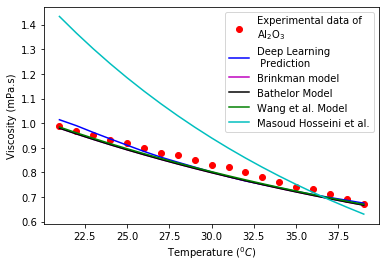

In [0]:
alpha=-0.485
mfactor= 0.72
beta=14.94
gamma=0.0105
Tzero=20
dp=30
R=1
def Brinkman(fBaseV,pPhi):
    return (np.multiply((1+2.5*pPhi),fBaseV))
def Bathelor(fBaseV,pPhi):    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi),fBaseV))
def Wang(fBaseV,pPhi):    
    return (np.multiply((1+7.3*pPhi+123*pPhi*pPhi),fBaseV))
def Masoud(fBaseV,pPhi,fnT):    
    return (np.multiply(np.exp(mfactor+(alpha/Tzero)*fnT+beta*pPhi+(gamma*dp)/(1+R)),fBaseV))
datag = pd.read_csv('VisVsTempfor_d30phipoint01.csv')
T = datag.iloc[:,0:1]
ExpVis=datag.iloc[:,3:4]
PredVis=datag.iloc[:,2:3]
BaseVis=datag.iloc[:,1:2]
nT=T.to_numpy()
nExpVis=ExpVis.to_numpy()
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy() 
phin=0.001*np.ones(np.size(nBaseVis)).reshape(-1,1) # phi=[.04,.04,.04,.04.....]
plt.plot(nT,nExpVis,'ro')
plt.plot(nT,PredVis,'b')
plt.plot(nT, Brinkman(nBaseVis,phin),'m')
plt.plot(nT, Bathelor(nBaseVis,phin),'k')
plt.plot(nT, Wang(nBaseVis,phin),'g')
plt.plot(nT, Masoud(nBaseVis,phin,nT),'c')
plt.legend(['Experimental data of\nAl$_2$O$_3$ ','Deep Learning \n Prediction','Brinkman model','Bathelor Model','Wang et al. Model','Masoud Hosseini et al.'], loc='upper right')
plt.xlabel('Temperature ($^0C$)')
plt.ylabel('Viscosity (mPa.s)')
plt.savefig('Comparison_Al2o3_Temperatured30phipoint01.eps')
plt.show()

Comparison of different models with our deep learning model [Nanofluid Viscosity Vs Temperature] Nanoparticle TiO2: size 21nm and volume Concentration 1%

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


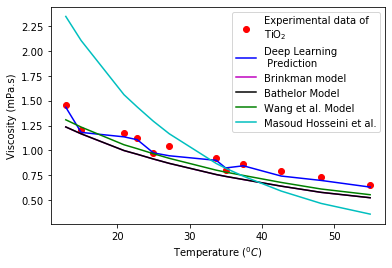

In [0]:
lpha=-0.485
mfactor= 0.72
beta=14.94
gamma=0.0105
Tzero=20
dp=21
R=1
def Brinkman(fBaseV,pPhi):
    return (np.multiply((1+2.5*pPhi),fBaseV))
def Bathelor(fBaseV,pPhi):    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi),fBaseV))
def Wang(fBaseV,pPhi):    
    return (np.multiply((1+7.3*pPhi+123*pPhi*pPhi),fBaseV))
def Masoud(fBaseV,pPhi,fnT):    
    return (np.multiply(np.exp(mfactor+(alpha/Tzero)*fnT+beta*pPhi+(gamma*dp)/(1+R)),fBaseV))
datag = pd.read_csv('VisVsTempfor_d21phi1_TIO2.csv')
T = datag.iloc[:,0:1]
BaseVis=datag.iloc[:,1:2]
ExpVis=datag.iloc[:,2:3]
PredVis=datag.iloc[:,3:4]

nT=T.to_numpy()
nExpVis=ExpVis.to_numpy()
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy() 
phin=0.01*np.ones(np.size(nBaseVis)).reshape(-1,1) # phi=[.04,.04,.04,.04.....]
plt.plot(nT,nExpVis,'ro')
plt.plot(nT,PredVis,'b')
plt.plot(nT, Brinkman(nBaseVis,phin),'m')
plt.plot(nT, Bathelor(nBaseVis,phin),'k')
plt.plot(nT, Wang(nBaseVis,phin),'g')
plt.plot(nT, Masoud(nBaseVis,phin,nT),'c')
plt.legend(['Experimental data of\nTiO$_2$ ','Deep Learning \n Prediction','Brinkman model','Bathelor Model','Wang et al. Model','Masoud Hosseini et al.'], loc='upper right')
plt.xlabel('Temperature ($^0C$)')
plt.ylabel('Viscosity (mPa.s)')
plt.savefig('Comparison_TiO2_Temperature(Concentration 1% size 21nm).eps')
plt.show()

Comparison of different models with our deep learning model [Nanofluid Viscosity Vs Temperature] Nanoparticle SiO2: size 12nm and volume Concentration 4%

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


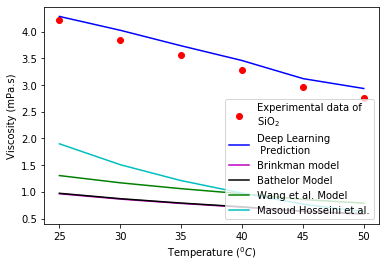

In [0]:
lpha=-0.485
mfactor= 0.72
beta=14.94
gamma=0.0105
Tzero=20
dp=12
R=1
def Brinkman(fBaseV,pPhi):
    return (np.multiply((1+2.5*pPhi),fBaseV))
def Bathelor(fBaseV,pPhi):    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi),fBaseV))
def Wang(fBaseV,pPhi):    
    return (np.multiply((1+7.3*pPhi+123*pPhi*pPhi),fBaseV))
def Masoud(fBaseV,pPhi,fnT):    
    return (np.multiply(np.exp(mfactor+(alpha/Tzero)*fnT+beta*pPhi+(gamma*dp)/(1+R)),fBaseV))
datag = pd.read_csv('VisVsTempfor_d12phi4SiO2.csv')
T = datag.iloc[:,0:1]
BaseVis=datag.iloc[:,1:2]
ExpVis=datag.iloc[:,2:3]
PredVis=datag.iloc[:,3:4]

nT=T.to_numpy()
nExpVis=ExpVis.to_numpy()
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy() 
phin=0.04*np.ones(np.size(nBaseVis)).reshape(-1,1) # phi=[.04,.04,.04,.04.....]
plt.plot(nT,nExpVis,'ro')
plt.plot(nT,PredVis,'b')
plt.plot(nT, Brinkman(nBaseVis,phin),'m')
plt.plot(nT, Bathelor(nBaseVis,phin),'k')
plt.plot(nT, Wang(nBaseVis,phin),'g')
plt.plot(nT, Masoud(nBaseVis,phin,nT),'c')
plt.legend(['Experimental data of\nSiO$_2$ ','Deep Learning \n Prediction','Brinkman model','Bathelor Model','Wang et al. Model','Masoud Hosseini et al.'], loc='lower right')
plt.xlabel('Temperature ($^0C$)')
plt.ylabel('Viscosity (mPa.s)')
plt.savefig('Comparison_SiO2_Temperature(Concentration 4% size 12nm).eps')
plt.show()

Comparison of different models with our deep learning model [Nanofluid Viscosity Vs Temperature] Nanoparticle CuO: size 29nm and volume Concentration 1%

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


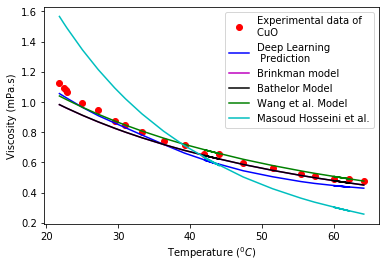

In [0]:
lpha=-0.485
mfactor= 0.72
beta=14.94
gamma=0.0105
Tzero=20
dp=29
R=1
def Brinkman(fBaseV,pPhi):
    return (np.multiply((1+2.5*pPhi),fBaseV))
def Bathelor(fBaseV,pPhi):    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi),fBaseV))
def Wang(fBaseV,pPhi):    
    return (np.multiply((1+7.3*pPhi+123*pPhi*pPhi),fBaseV))
def Masoud(fBaseV,pPhi,fnT):    
    return (np.multiply(np.exp(mfactor+(alpha/Tzero)*fnT+beta*pPhi+(gamma*dp)/(1+R)),fBaseV))
datag = pd.read_csv('VisVsTempfor_d29phi1CuO.csv')
T = datag.iloc[:,0:1]
BaseVis=datag.iloc[:,1:2]
ExpVis=datag.iloc[:,2:3]
PredVis=datag.iloc[:,3:4]
nT=T.to_numpy()
nExpVis=ExpVis.to_numpy()
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy() 
phin=0.01*np.ones(np.size(nBaseVis)).reshape(-1,1) # phi=[.04,.04,.04,.04.....]
plt.plot(nT,nExpVis,'ro')
plt.plot(nT,PredVis,'b')
plt.plot(nT, Brinkman(nBaseVis,phin),'m')
plt.plot(nT, Bathelor(nBaseVis,phin),'k')
plt.plot(nT, Wang(nBaseVis,phin),'g')
plt.plot(nT, Masoud(nBaseVis,phin,nT),'c')
plt.legend(['Experimental data of\nCuO ','Deep Learning \n Prediction','Brinkman model','Bathelor Model','Wang et al. Model','Masoud Hosseini et al.'], loc='upper right')
plt.xlabel('Temperature ($^0C$)')
plt.ylabel('Viscosity (mPa.s)')
plt.savefig('Comparison_CuO_Temperature(Concentration 1% size 29nm).eps')
plt.show()

Comparison of different models with our deep learning model [Nanofluid Viscosity Vs Temperature] Nanoparticle CuO: size 29nm and volume Concentration 7%

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


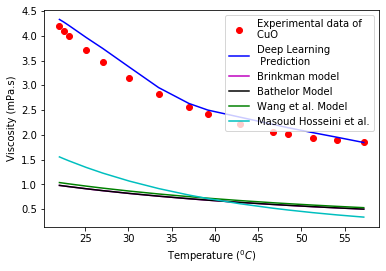

In [0]:
lpha=-0.485
mfactor= 0.72
beta=14.94
gamma=0.0105
Tzero=20
dp=29
R=1
def Brinkman(fBaseV,pPhi):
    return (np.multiply((1+2.5*pPhi),fBaseV))
def Bathelor(fBaseV,pPhi):    
    return (np.multiply((1+2.5*pPhi+6.25*pPhi*pPhi),fBaseV))
def Wang(fBaseV,pPhi):    
    return (np.multiply((1+7.3*pPhi+123*pPhi*pPhi),fBaseV))
def Masoud(fBaseV,pPhi,fnT):    
    return (np.multiply(np.exp(mfactor+(alpha/Tzero)*fnT+beta*pPhi+(gamma*dp)/(1+R)),fBaseV))
datag = pd.read_csv('VisVsTempfor_d29phi7CuO.csv')
T = datag.iloc[:,0:1]
BaseVis=datag.iloc[:,1:2]
ExpVis=datag.iloc[:,2:3]
PredVis=datag.iloc[:,3:4]
nT=T.to_numpy()
nExpVis=ExpVis.to_numpy()
nPredVis=PredVis.to_numpy()
nBaseVis=BaseVis.to_numpy() 
phin=0.01*np.ones(np.size(nBaseVis)).reshape(-1,1) # phi=[.04,.04,.04,.04.....]
plt.plot(nT,nExpVis,'ro')
plt.plot(nT,PredVis,'b')
plt.plot(nT, Brinkman(nBaseVis,phin),'m')
plt.plot(nT, Bathelor(nBaseVis,phin),'k')
plt.plot(nT, Wang(nBaseVis,phin),'g')
plt.plot(nT, Masoud(nBaseVis,phin,nT),'c')
plt.legend(['Experimental data of\nCuO ','Deep Learning \n Prediction','Brinkman model','Bathelor Model','Wang et al. Model','Masoud Hosseini et al.'], loc='upper right')
plt.xlabel('Temperature ($^0C$)')
plt.ylabel('Viscosity (mPa.s)')
plt.savefig('Comparison_CuO_Temperature(Concentration 7% size 29nm).eps')
plt.show()

In [0]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))
# Start a simple Keras sequential model
#-----------------------------------------------------------------------------
# set the seeds for reproducible results with TF (wont work with GPU, only CPU)
#np.random.seed(12345)
np.random.seed(1337) 
# set the TF seed
set_random_seed(1337)
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=64, activation='relu', input_dim=5))
prediction_network.add(Dense(units=64, activation = 'relu'))
prediction_network.add(Dense(units=32, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'relu'))
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
prediction_network.compile(optimizer=optimizers.Adam(lr=.001), loss='mean_squared_error', metrics=[mse,rmse,r_square])
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#Fitting model
result_Adam=prediction_network.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test), callbacks=[earlystopping])


In [0]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

np.random.seed(1337) 
# set the TF seed
set_random_seed(1337)
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=64, activation='relu', input_dim=5))
prediction_network.add(Dense(units=64, activation = 'relu'))
prediction_network.add(Dense(units=32, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'relu'))
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
prediction_network.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=[mse,rmse,r_square])
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#Fitting model
result_rmsprop=prediction_network.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test), callbacks=[earlystopping])


In [0]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))
# Start a simple Keras sequential model
#-----------------------------------------------------------------------------
# set the seeds for reproducible results with TF (wont work with GPU, only CPU)
#np.random.seed(12345)
np.random.seed(1337) 
# set the TF seed
set_random_seed(1337)
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=64, activation='relu', input_dim=5))
prediction_network.add(Dense(units=64, activation = 'relu'))
prediction_network.add(Dense(units=32, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'relu'))
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
prediction_network.compile(optimizer=optimizers.Nadam(lr=.001), loss='mean_squared_error', metrics=[mse,rmse,r_square])
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#Fitting model
result_Nadam=prediction_network.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test), callbacks=[earlystopping])


In [0]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

np.random.seed(1337) 
# set the TF seed
set_random_seed(1337)
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=64, activation='relu', input_dim=5))
prediction_network.add(Dense(units=64, activation = 'relu'))
prediction_network.add(Dense(units=32, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'relu'))
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
sgd = optimizers.SGD(lr=0.001)
prediction_network.compile(optimizer=sgd, loss='mean_squared_error', metrics=[mse,rmse,r_square])
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#Fitting model
result_sgd=prediction_network.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test), callbacks=[earlystopping])


In [0]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

np.random.seed(1337) 
# set the TF seed
set_random_seed(1337)
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=64, activation='relu', input_dim=5))
prediction_network.add(Dense(units=64, activation = 'relu'))
prediction_network.add(Dense(units=32, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'relu'))
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
sgd = optimizers.SGD(lr=0.001,momentum=0.9)
prediction_network.compile(optimizer=sgd, loss='mean_squared_error', metrics=[mse,rmse,r_square])
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#Fitting model
result_sgdPlusMoment=prediction_network.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test), callbacks=[earlystopping])


In [0]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

np.random.seed(1337) 
# set the TF seed
set_random_seed(1337)
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=64, activation='relu', input_dim=5))
prediction_network.add(Dense(units=64, activation = 'relu'))
prediction_network.add(Dense(units=32, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'relu'))
#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
sgd = optimizers.SGD(lr=0.001,nesterov=True)
prediction_network.compile(optimizer=sgd, loss='mean_squared_error', metrics=[mse,rmse,r_square])
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#Fitting model
result_sgdPlusNesterov=prediction_network.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test), callbacks=[earlystopping])


In [0]:
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
# mean squared error (mse) for regression
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
# coefficient of determination (R^2) for regression
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot))
def r_square_loss(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return 1 - ( 1 - SS_res/(SS_tot + K.epsilon()))

np.random.seed(1337) 
# set the TF seed
set_random_seed(1337)
# Neural Network
prediction_network = Sequential()
prediction_network.add(Dense(units=64, activation='relu', input_dim=5))
prediction_network.add(Dense(units=64, activation = 'relu'))
prediction_network.add(Dense(units=32, activation = 'relu'))
prediction_network.add(Dense(units=1,activation = 'relu'))
sgd = optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
#sgd = optimizers.SGD(lr=0.001)
prediction_network.compile(optimizer=sgd, loss='mean_squared_error', metrics=[mse,rmse,r_square])
earlystopping=EarlyStopping(monitor="mean_squared_error", patience=40, verbose=1, mode='auto')
#Fitting model
result_sgdPlusNesterovPlusMomentum=prediction_network.fit(X_train, y_train, batch_size=10, epochs=100,validation_data=(X_test, y_test), callbacks=[earlystopping])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


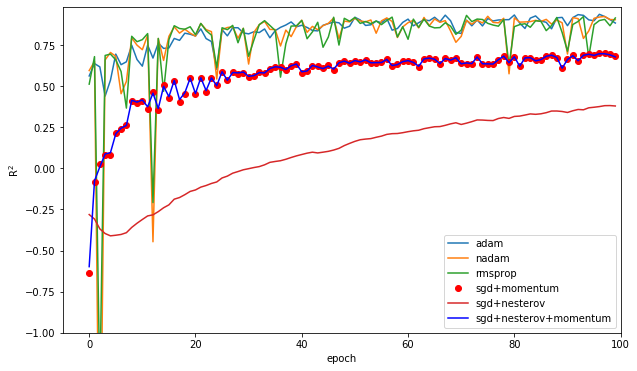

In [0]:
plt.figure(figsize=(10, 6))  
plt.axis((-5,100,-1,0.983))

plt.plot(result_Adam.history['val_r_square'])
plt.plot(result_Nadam.history['val_r_square'])
plt.plot(result_rmsprop.history['val_r_square'])
#plt.plot(result_sgd.history['val_r_square'],'ko')
plt.plot(result_sgdPlusMoment.history['val_r_square'],'ro')
plt.plot(result_sgdPlusNesterov.history['val_r_square'])
plt.plot(result_sgdPlusNesterovPlusMomentum.history['val_r_square'],'b')
#plt.title('val_r_square')  
plt.ylabel('R$^2$')  
plt.xlabel('epoch')  
plt.legend(['adam', 'nadam', 'rmsprop','sgd+momentum','sgd+nesterov', 'sgd+nesterov+momentum'], loc='lower right') 
plt.savefig('OptimizersComparison_R_square.eps') 
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


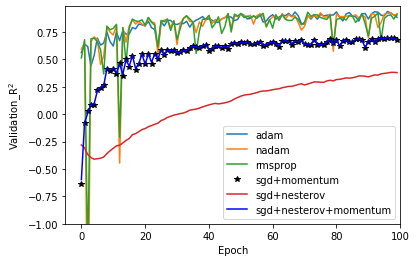

In [0]:
#plt.figure(figsize=(10, 6))  
plt.axis((-5,100,-1,0.983))

plt.plot(result_Adam.history['val_r_square'])
plt.plot(result_Nadam.history['val_r_square'])
plt.plot(result_rmsprop.history['val_r_square'])
#plt.plot(result_sgd.history['val_r_square'])
plt.plot(result_sgdPlusMoment.history['val_r_square'],'k*')
plt.plot(result_sgdPlusNesterov.history['val_r_square'])
plt.plot(result_sgdPlusNesterovPlusMomentum.history['val_r_square'],'b')
#plt.title('val_r_square')  
plt.ylabel('Validation_R$^2$')  
plt.xlabel('Epoch')  
plt.legend(['adam', 'nadam', 'rmsprop','sgd+momentum','sgd+nesterov', 'sgd+nesterov+momentum'], loc='lower right') 
plt.savefig('OptimizersComparison_Val_R_square.eps') 
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


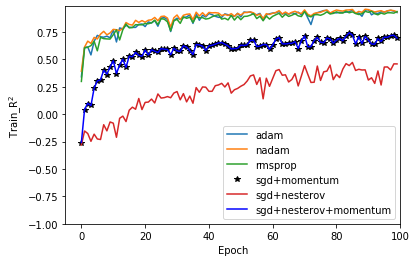

In [0]:
#plt.figure(figsize=(10, 6))  
plt.axis((-5,100,-1,0.983))
plt.plot(result_Adam.history['r_square'])
plt.plot(result_Nadam.history['r_square'])
plt.plot(result_rmsprop.history['r_square'])
#plt.plot(result_sgd.history['r_square'])
plt.plot(result_sgdPlusMoment.history['r_square'],'k*')
plt.plot(result_sgdPlusNesterov.history['r_square'])
plt.plot(result_sgdPlusNesterovPlusMomentum.history['r_square'],'b')
#plt.title('val_r_square')  
plt.ylabel('Train_R$^2$')  
plt.xlabel('Epoch')  
plt.legend(['adam', 'nadam', 'rmsprop','sgd+momentum','sgd+nesterov', 'sgd+nesterov+momentum'], loc='lower right') 
plt.savefig('OptimizersComparison_Train_R_square.eps') 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


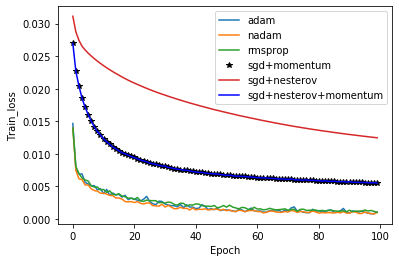

In [0]:
#plt.figure(figsize=(10, 6))  
#plt.axis((-5,100,-1,0.983))
plt.plot(result_Adam.history['loss'])
plt.plot(result_Nadam.history['loss'])
plt.plot(result_rmsprop.history['loss'])
#plt.plot(result_sgd.history['loss'])
plt.plot(result_sgdPlusMoment.history['loss'],'k*')
plt.plot(result_sgdPlusNesterov.history['loss'])
plt.plot(result_sgdPlusNesterovPlusMomentum.history['loss'],'b')
#plt.title('val_r_square')  
plt.ylabel('Train_loss')  
plt.xlabel('Epoch')  
plt.legend(['adam', 'nadam', 'rmsprop','sgd+momentum','sgd+nesterov', 'sgd+nesterov+momentum'], loc='top right') 
plt.savefig('OptimizersComparison_Train_loss.eps') 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


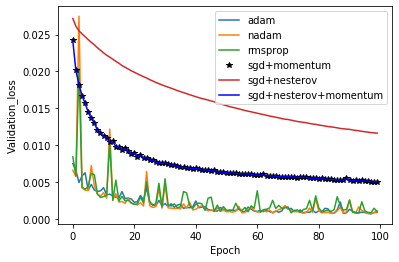

In [0]:
#plt.figure(figsize=(10, 6))  
#plt.axis((-5,100,-1,0.983))
plt.plot(result_Adam.history['val_loss'])
plt.plot(result_Nadam.history['val_loss'])
plt.plot(result_rmsprop.history['val_loss'])
#plt.plot(result_sgd.history['val_loss'])
plt.plot(result_sgdPlusMoment.history['val_loss'],'k*')
plt.plot(result_sgdPlusNesterov.history['val_loss'])
plt.plot(result_sgdPlusNesterovPlusMomentum.history['val_loss'],'b')
#plt.title('val_r_square')  
plt.ylabel('Validation_loss')  
plt.xlabel('Epoch')  
plt.legend(['adam', 'nadam', 'rmsprop','sgd+momentum','sgd+nesterov', 'sgd+nesterov+momentum'], loc='top right') 
plt.savefig('OptimizersComparison_Validation_loss.eps') 
plt.show()

In [0]:
#plt.figure(figsize=(10, 6))  
#plt.axis((-5,100,-1,0.983))
plt.plot(result_Adam.history['val_rmse'])
plt.plot(result_Nadam.history['val_rmse'])
plt.plot(result_rmsprop.history['val_rmse'])
#plt.plot(result_sgd.history['val_rmse'])
plt.plot(result_sgdPlusMoment.history['val_rmse'],'k*')
plt.plot(result_sgdPlusNesterov.history['val_rmse'])
plt.plot(result_sgdPlusNesterovPlusMomentum.history['val_rmse'],'b')
#plt.title('val_r_square')  
plt.ylabel('Validation_rmse')  
plt.xlabel('Epoch')  
plt.legend(['adam', 'nadam', 'rmsprop','sgd+momentum','sgd+nesterov', 'sgd+nesterov+momentum'], loc='top right') 
plt.savefig('OptimizersComparison_Validation_rmse.eps') 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


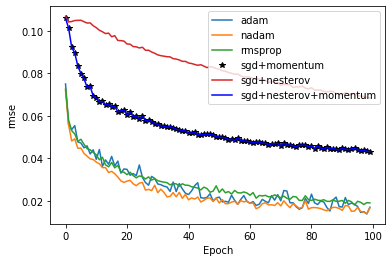

In [0]:
#plt.figure(figsize=(10, 6))  
#plt.axis((-5,100,-1,0.983))
plt.plot(result_Adam.history['rmse'])
plt.plot(result_Nadam.history['rmse'])
plt.plot(result_rmsprop.history['rmse'])
#plt.plot(result_sgd.history['rmse'])
plt.plot(result_sgdPlusMoment.history['rmse'],'k*')
plt.plot(result_sgdPlusNesterov.history['rmse'])
plt.plot(result_sgdPlusNesterovPlusMomentum.history['rmse'],'b')
#plt.title('val_r_square')  
plt.ylabel('rmse')  
plt.xlabel('Epoch')  
plt.legend(['adam', 'nadam', 'rmsprop','sgd+momentum','sgd+nesterov', 'sgd+nesterov+momentum'], loc='top right') 
plt.savefig('OptimizersComparison_Train_rmse.eps') 
plt.show()